## Projeto Computação Quântica 2019.2
Centro de Informática - UFPE

Aluna: Débora Fortunato Dias (dfd2), Jerônimo

### Algoritmo de Grover e Otimizações

 


#### Roteiro

- Algoritmo de Grover
- Simulação I
- Otimizações
- Simulação II
- Conclusão
- Referências

### Algoritmo de Grover

Dado um espaço de N elementos, com M sendo o conjunto de soluções buscadas. Achar as soluções em $\sqrt{\frac{N}{M}}$ iterações.

- Inicialização

Todos qbits são iniciados em superposição, seus estados têm amplitude $\sqrt{N}$.

- Oráculo

O oráculo $O$ marca o estado $x_{0}$ que satisfaz a condição $f(x_{0}) = 1$ através de uma mudança de fase. Todos os outros estados permanecem inalterados. A operação tem o efeito de inverter a amplitude do estado marcado.

- Amplificação

Essa fase realiza a amplificação de amplitudes pela inversão sobre a média. Como a amplitude do estado alvo foi invertida enquanto os outros estados mantiveram suas amplitudes originais (fase anterior), essa mudança faz com que a amplitude do estado alvo aumente enquanto os outros diminuem.

- Medição

Os qbits são colapsados em um valor clássico.


##### Inicialização

In [285]:
N = 3

q = QuantumRegister(4,"q") #3 registradores e 1 ancilla
c = ClassicalRegister(3,"c")

circuit = QuantumCircuit(q,c)

circuit.h(q[0:3]) #hadamard

##### Oráculo

A ação do oráculo marca essencialmente a solução. Então, precisamos de algo que execute a operação abaixo.

- x é o índice do registrador
- O é um operador unitário
- f(x) é uma função de x que inverte q caso ele seja solução
- $\oplus$ é a soma módulo 2

O oráculo pode ser representado por:

 $$ \left| x \right\rangle \left| q \right\rangle \xrightarrow{O} \left| x \right\rangle \left| q \oplus f(x) \right\rangle $$
 

 Ou ainda mais simplificadamente:
 
 $$ \left| x \right\rangle \xrightarrow{O} (-1)^{f(x)} \left| x \right\rangle $$

In [2]:
    circuit.x(q[0])
    circuit.x(q[1])
    
    circuit.ccx(q[0], q[1], q[3]) #marca 000 e 001
    
    circuit.x(q[0])
    circuit.x(q[1])

NameError: name 'circuit' is not defined

##### Amplificação (Inversão sobre a média)

Um passo importante do algoritmo é ampliar a probabilidade de observação. Esta etapa executa essencialmente estas operações principais:

- Aplicar H a todos os qbits
- Aplicar uma mudança de fase condicional
- Aplique H a todos os qbits novamente

In [287]:
    circuit.h(q[0:3])
    circuit.x(q[0:3])
    circuit.mct(q[0:3], q[3], None, mode='advanced') 
    circuit.x(q[0:3])
    circuit.h(q[0:3])

### Implementação

### 3 Qbits (t = 1, 2) simulação local

In [17]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ
from qiskit.providers.ibmq import least_busy
import math as m
from qiskit.visualization import plot_histogram

import getpass


#MY_API_TOKEN = getpass.getpass("Seu token: ")
MY_API_TOKEN = "aea761906cf3a1b9574da60083f4915dde97272a5d9f837c924c4d3ad1ec2192c7db0b9c19212a61fe54cd27fd511ad33b8627c73c9c7cce735e3f69134ddcad"
IBMQ.enable_account(MY_API_TOKEN)

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [2]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ
from qiskit.providers.ibmq import least_busy
import math as m
from qiskit.visualization import plot_histogram

import getpass


#MY_API_TOKEN = getpass.getpass("Seu token: ")
#MY_API_TOKEN = "f403bbd759ec5c7cb43989d2d655fe7ee5287fa0b073a6694c2aea98f07f55d2f6d43576e8d25daf8bc9c33504303ec97757f6f1652d9b6d716b216da4fea38a"
#IBMQ.enable_account(MY_API_TOKEN)
    
def Oraculo(circuit, q):
    circuit.x(q[0])
    circuit.x(q[1])
    
    circuit.mct(q[0:3], q[3], None, mode='advanced') #usar para uma solucao
    #circuit.ccx(q[0], q[1], q[3]) #usar para duas solucoes
    
    circuit.x(q[0])
    circuit.x(q[1])
    
    
def InversaoSobreMedia(circuit, q):
    circuit.h(q[0:3])
    circuit.x(q[0:3])
    circuit.mct(q[0:3], q[3], None, mode='advanced') 
    circuit.x(q[0:3])
    circuit.h(q[0:3])

q = QuantumRegister(4,"q")
c = ClassicalRegister(3,"c")

circuit = QuantumCircuit(q,c)

circuit.h(q[0:3])
circuit.x(q[3])
circuit.h(q[3])

circuit.barrier(q)

N = 8
M = 1

iteracoes = m.floor(m.pi *(N/M)**(1/2) / 4 ) 
for i in range(iteracoes):#
    Oraculo(circuit, q)
    circuit.barrier(q)
    InversaoSobreMedia(circuit,q)
    circuit.barrier(q)
    print(iteracoes)
    
    
#circuit.barrier(q)


2
2


### Simulação I

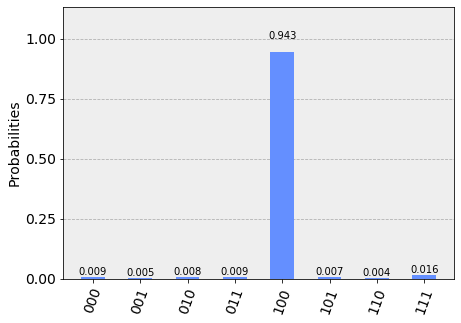

In [3]:
circuit.measure(q[0:3], c[0:3])

backend = Aer.get_backend('qasm_simulator')

job = execute(circuit, backend, shots=1024)
result = job.result()
counts = result.get_counts(circuit)


plot_histogram(counts)

In [18]:
AccountProvider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
AccountProvider.backends()

#filters=lambda x: x.configuration().n_qubits <= 5 and not x.configuration().simulator and x.status().operational==True
backend = least_busy(AccountProvider.backends(operational=True))

backend = AccountProvider.get_backend("ibmqx2")
#print(backend.configuration())
print("least busy backend: ", backend)

least busy backend:  ibmqx2


In [32]:
q = QuantumRegister(3,"q")
c = ClassicalRegister(3,"c")

circuit = QuantumCircuit(q,c)

circuit.h(q[0:2])

circuit.draw(output='latex')

ImportError: The latex and latex_source drawers need pylatexenc installed. Run "pip install pylatexenc" before using the latex or latex_source drawers.

least busy backend:  ibmq_16_melbourne


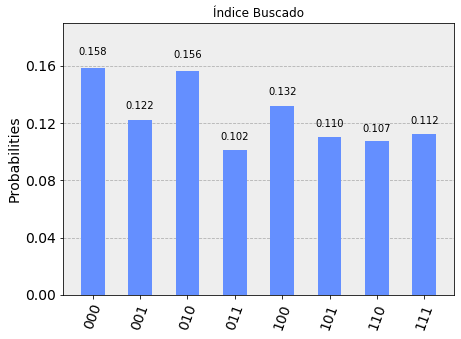

In [34]:

job = execute(circuit, backend, shots = 1024)

result = job.result()
counts = result.get_counts(circuit)
plot_histogram(counts, title='Índice Buscado')

In [39]:

#circuit.draw(output='mpl') 

### 3 Qbits (t = 1,2,3) simulação/IBM

In [207]:
#initialization
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import math as m

# importing Qiskit
from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.tools.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor
from qiskit.circuit import Gate
from qiskit.providers.aer import QasmSimulator

def oraculo(qc, qr):
    
    
    """#11 (+ - pauli x)
    #qc.x(qr[1])

    qc.cx(qr[0], qr[1])

    #qc.x(qr[1]) """
    
    
    
    """qc.cz(qr[2],qr[0]) #duas solucoes ao msm tempo
    qc.cz(qr[2],qr[1]) #duas solucoes ao msm tempo"""
    
    
    #100
    qc.x(qr[1])
    qc.x(qr[2])

    qc.h(qr[2])
    qc.ccx(qr[0], qr[1], qr[2])
    qc.h(qr[2])

    qc.x(qr[1])
    qc.x(qr[2])
    
    
    
    #001
    qc.x(qr[0])
    qc.x(qr[1])

    qc.h(qr[2])
    qc.ccx(qr[0], qr[1], qr[2])
    qc.h(qr[2])

    qc.x(qr[0])
    qc.x(qr[1])
    
    
    """#110
    qc.x(qr[0])

    qc.h(qr[2])
    qc.ccx(qr[0], qr[1], qr[2])
    qc.h(qr[2])

    qc.x(qr[0])"""
    
    
    
    """#101
    qc.x(qr[1])

    qc.h(qr[2])
    qc.ccx(qr[0], qr[1], qr[2])
    qc.h(qr[2])

    qc.x(qr[1])
    """

    #111
    qc.h(qr[2])
    qc.ccx(qr[0], qr[1], qr[2])
    qc.h(qr[2]) 
    
     
    


def nCZ(circuit, controls, target):
    if (len(controls) > 4):
        raise ValueError('Nao implementado')
    elif (len(controls) == 1):
        circuit.h(target)
        circuit.cx(controls[0], target)
        circuit.h(target)
    elif (len(controls) == 2):
        circuit.h(target)
        circuit.ccx(controls[0], controls[1], target)
        circuit.h(target)
    elif (len(controls) == 3):       
        circuit.h(target)
        circuit.cccx(controls[0], controls[1], controls[2], target)
        circuit.h(target)
                

def inversao(qc, qr, n):
    qc.h(qr)
    qc.x(qr)
    
    nCZ(qc, [qr[j] for j in range(n-1)], qr[n-1])
    
    qc.x(qr)
    qc.h(qr)


pi = m.pi
n = 3
N = 2**n
M = 3

qr = QuantumRegister(n)
cr = ClassicalRegister(n)

groverCircuit = QuantumCircuit(qr,cr)
groverCircuit.h(qr)

iteracoes = m.floor(m.pi *(N/M)**(1/2) / 4 ) 

for i in range(3):
    oraculo(groverCircuit, qr)
    groverCircuit.barrier()
    inversao(groverCircuit, qr, n)
    groverCircuit.barrier()
    
print(iteracoes)

groverCircuit.measure(qr,cr)




1


{'111': 2699, '100': 2669, '000': 18, '101': 18, '001': 2750, '110': 16, '011': 13, '010': 9}
0.11188292503356934


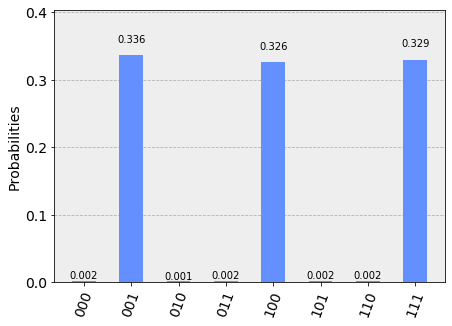

In [208]:
backend = BasicAer.get_backend('qasm_simulator')

result = execute(groverCircuit, backend, shots = 8192,  optimization_level=3).result()
counts = result.get_counts(0)
print(counts)
print(result.time_taken)

plot_histogram(counts)

In [30]:
N = 8
M = 3
conta = m.sin( (2*3+1)*m.asin( (M/N)**(1/2) ) )**2
print(conta)

0.9902343749999999


least busy backend:  ibmq_16_melbourne
Job Status: job has successfully run
{'100': 152, '011': 116, '111': 98, '010': 146, '101': 108, '000': 142, '110': 135, '001': 127}


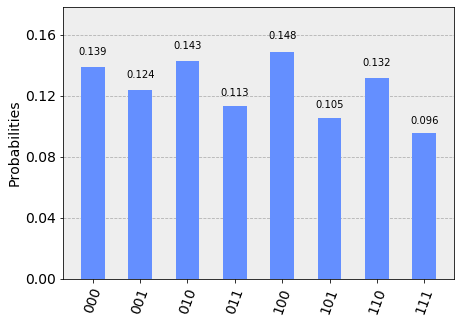

In [13]:
from qiskit.tools.monitor import job_monitor


IBMQ.get_provider(hub='ibm-q')
AccountProvider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
AccountProvider.backends()

#filters=lambda x: x.configuration().n_qubits <= 5 and not x.configuration().simulator and x.status().operational==True
#backend = least_busy(AccountProvider.backends(operational=True))
backend = AccountProvider.get_backend("ibmq_16_melbourne")
print("least busy backend: ", backend)


shots = 1024
job = execute(groverCircuit, backend=backend, shots=shots, optimization_level=3)

job_monitor(job, interval = 2)

results = job.result()
answer = results.get_counts(groverCircuit)
print(answer)
#print(results.time_taken)

plot_histogram(answer)



In [410]:
backend = AccountProvider.get_backend("ibmq_ourense")
print("least busy backend: ", backend)

least busy backend:  ibmq_ourense


### BBHT



In [424]:
#initialization
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import math 
import random

# importing Qiskit
from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.tools.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor
from qiskit.circuit import Gate
from qiskit.providers.aer import QasmSimulator

def oraculo(qc, qr):
    
    """#100
    qc.x(qr[1])
    qc.x(qr[2])

    qc.h(qr[2])
    qc.ccx(qr[0], qr[1], qr[2])
    qc.h(qr[2])

    qc.x(qr[1])
    qc.x(qr[2])"""
    
    
    
    """#001
    qc.x(qr[0])
    qc.x(qr[1])

    qc.h(qr[2])
    qc.ccx(qr[0], qr[1], qr[2])
    qc.h(qr[2])

    qc.x(qr[0])
    qc.x(qr[1])
    """
    
    """#110
    qc.x(qr[0])

    qc.h(qr[2])
    qc.ccx(qr[0], qr[1], qr[2])
    qc.h(qr[2])

    qc.x(qr[0])
    
    
    
    
    #101
    qc.x(qr[1])

    qc.h(qr[2])
    qc.ccx(qr[0], qr[1], qr[2])
    qc.h(qr[2])

    qc.x(qr[1])"""
    
    
    

    #111
    qc.h(qr[2])
    qc.ccx(qr[0], qr[1], qr[2])
    qc.h(qr[2])
    

def nCZ(circuit, controls, target):
    if (len(controls) > 4):
        raise ValueError('Nao implementado')
    elif (len(controls) == 1):
        circuit.h(target)
        circuit.cx(controls[0], target)
        circuit.h(target)
    elif (len(controls) == 2):
        circuit.h(target)
        circuit.ccx(controls[0], controls[1], target)
        circuit.h(target)
    elif (len(controls) == 3):       
        circuit.h(target)
        circuit.cccx(controls[0], controls[1], controls[2], target)
        circuit.h(target)
                

def inversao(qc, qr, n):
    qc.h(qr)
    qc.x(qr)
    
    nCZ(qc, [qr[j] for j in range(n-1)], qr[n-1])
    
    qc.x(qr)
    qc.h(qr)
    
def groverIteracao(groverCircuit, qr, n):
    oraculo(groverCircuit, qr)
    inversao(groverCircuit, qr, n)


pi = math.pi
n = 3
N = 2**n
m = 1
lmb = 1.34
upperBound = math.floor((N)**(1/2))

qr = QuantumRegister(n, 'q')
cr = ClassicalRegister(n, 'c')

groverCircuit = QuantumCircuit(qr,cr)
groverCircuit.h(qr)

contador = 1


IBMQ.get_provider(hub='ibm-q')
AccountProvider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')

#backend = BasicAer.get_backend('qasm_simulator')
backend = AccountProvider.get_backend("ibmq_ourense")
achou = 0

while (achou == 0):
    print("====== iteracao : ", contador, "======")
    kLista = list(range(1, math.floor(m+1))) 
    print("lista de k : ", kLista)
    kAleatorio = random.choice(kLista)
    print("iteracoes de grover : ", kAleatorio)
    
    for i in range(kAleatorio):
        groverIteracao(groverCircuit, qr, n)
    
    groverCircuit.measure(qr,cr) 
    result = execute(groverCircuit, backend, shots = 1,  optimization_level=3).result()
    counts = result.get_counts()
    
    for j in counts:
        if (j in ['111']):
            print(j, " - ok")
            achou = 1
        else:
            print(j, " - nope")
            m = (m*lmb)
            print(m)
    
    print(counts)
    contador = contador + 1
    
    
    """
    for j in counts:
        contador.append(counts[j])
        if (counts[j] > 150):
            print("achou : ", j)
            #break
        else:
            m = m*lmb
    
    if (counts['111'] > 150):
        print ("ok")
        break
    else:
        m = m*lmb"""
        

        
plot_histogram(counts)
    
print("tempo gasto: ", result.time_taken)



====== iteracao :  1 ======
lista de k :  [1]
iteracoes de grover :  1
111  - ok
{'111': 1}
tempo gasto:  3.2235443592071533


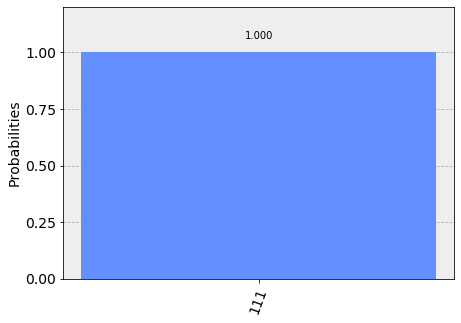

In [406]:
plot_histogram(counts)

### 2 Qbit Grover (t = 1, 2) Simulação/IBM BOM

1
{'00': 1968, '10': 2005, '01': 2088, '11': 2131}
0.0249330997467041


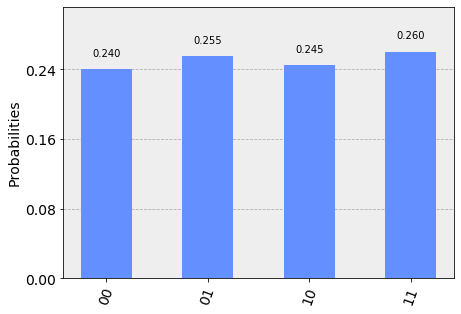

In [425]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.tools.visualization import plot_histogram, circuit_drawer
import math as m
from qiskit.visualization import plot_histogram

def Oraculo(qc,q):
    
    """for i in range(2):
        qc.h(q[i])

    
    # s em todos qbits
    for i in range(2):
        qc.s(q[i])"""

    #qc.cx(q[0], q[1]) #duas solucoes
    
    qc.x(q[0])
    qc.x(q[1])
    qc.cz(q[0], q[1]) #uma solucao
    
    #qc.cx(q[0], q[1]) #duas solucoes
    
    qc.x(q[0])
    qc.x(q[1])
    
    
    """for i in range(2):
        qc.s(q[i])"""
        
        
    
def Inversao(qc,q):
    for i in range(2):
        qc.h(q[i])
        
    for i in range(2):
        qc.x(q[i])

    qc.cz(q[0], q[1]) #equivlente h x h

    # Apply X to all bits
    for i in range(2):
        qc.x(q[i])

    # Apply H to all bits				
    for i in range(2):
        qc.h(q[i])


q = QuantumRegister(2)
c = ClassicalRegister(2)
qc = QuantumCircuit(q, c)

N = 4
M = 2

iteracoes = m.floor(m.pi *(N/M)**(1/2) / 4 ) 
for i in range(iteracoes):#
    Oraculo(qc, q)
    qc.barrier(q)
    Inversao(qc,q)
    qc.barrier(q)
    print(iteracoes)

qc.measure(q, c)

simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, simulator, shots=8192).result()
counts = result.get_counts(qc)
print(counts)
print(result.time_taken)

plot_histogram(counts)

least busy backend:  ibmq_ourense
Job Status: job has successfully run
{'00': 37, '10': 24, '01': 483, '11': 480}
8.478020906448364


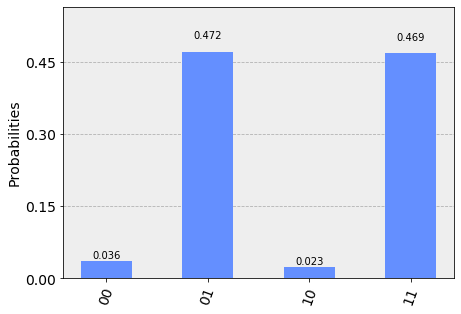

In [361]:
from qiskit.tools.monitor import job_monitor

AccountProvider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
AccountProvider.backends()

#filters=lambda x: x.configuration().n_qubits <= 5 and not x.configuration().simulator and x.status().operational==True
#backend = least_busy(AccountProvider.backends(operational=True))
backend = AccountProvider.get_backend("ibmq_ourense")
print("least busy backend: ", backend)

job = execute(qc, backend, shots = 1024, optimization_level=3)

job_monitor(job, interval = 2)

results = job.result()
answer = results.get_counts(qc)
print(answer)
print(results.time_taken)

plot_histogram(answer)


### 4 Qbits (t = 1, 2, 3)  simulação

2
2
{'0100': 4, '1100': 4, '0101': 8, '1001': 3, '1011': 4, '0001': 6, '0111': 5, '0011': 467, '1101': 6, '1110': 3, '1111': 3, '0000': 4, '1010': 1, '0110': 5, '1000': 5, '0010': 496}
0.1235969066619873


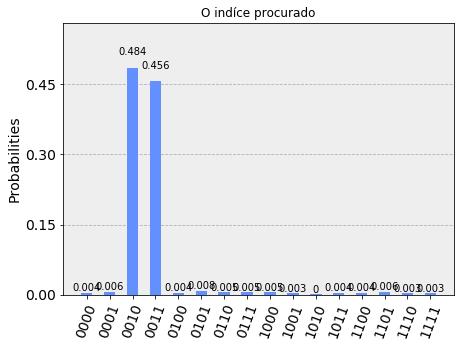

In [19]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.tools.visualization import plot_histogram, circuit_drawer
import math as m
from qiskit.visualization import plot_histogram

#oraculo
def Oraculo(qc,qr):
    
    
    #0010
    qc.x(qr[0])
    qc.x(qr[2])
    qc.x(qr[3])

    qc.cu1(pi/4, qr[0], qr[3])
    qc.cx(qr[0], qr[1])
    qc.cu1(-pi/4, qr[1], qr[3])
    qc.cx(qr[0], qr[1])
    qc.cu1(pi/4, qr[1], qr[3])
    qc.cx(qr[1], qr[2])
    qc.cu1(-pi/4, qr[2], qr[3])
    qc.cx(qr[0], qr[2])
    qc.cu1(pi/4, qr[2], qr[3])
    qc.cx(qr[1], qr[2])
    qc.cu1(-pi/4, qr[2], qr[3])
    qc.cx(qr[0], qr[2])
    qc.cu1(pi/4, qr[2], qr[3])

    qc.x(qr[0])
    qc.x(qr[2])
    qc.x(qr[3])
    
    """
    #0000
    qc.x(qr[0])
    qc.x(qr[1])
    qc.x(qr[2])
    qc.x(qr[3])

    qc.cu1(pi/4, qr[0], qr[3])
    qc.cx(qr[0], qr[1])
    qc.cu1(-pi/4, qr[1], qr[3])
    qc.cx(qr[0], qr[1])
    qc.cu1(pi/4, qr[1], qr[3])
    qc.cx(qr[1], qr[2])
    qc.cu1(-pi/4, qr[2], qr[3])
    qc.cx(qr[0], qr[2])
    qc.cu1(pi/4, qr[2], qr[3])
    qc.cx(qr[1], qr[2])
    qc.cu1(-pi/4, qr[2], qr[3])
    qc.cx(qr[0], qr[2])
    qc.cu1(pi/4, qr[2], qr[3])

    qc.x(qr[0])
    qc.x(qr[1])
    qc.x(qr[2])
    qc.x(qr[3])"""
    
    
    
    #0011
    qc.x(qr[2])
    qc.x(qr[3])

    qc.cu1(pi/4, qr[0], qr[3])
    qc.cx(qr[0], qr[1])
    qc.cu1(-pi/4, qr[1], qr[3])
    qc.cx(qr[0], qr[1])
    qc.cu1(pi/4, qr[1], qr[3])
    qc.cx(qr[1], qr[2])
    qc.cu1(-pi/4, qr[2], qr[3])
    qc.cx(qr[0], qr[2])
    qc.cu1(pi/4, qr[2], qr[3])
    qc.cx(qr[1], qr[2])
    qc.cu1(-pi/4, qr[2], qr[3])
    qc.cx(qr[0], qr[2])
    qc.cu1(pi/4, qr[2], qr[3])


    qc.x(qr[2])
    qc.x(qr[3])
      
    
    
    
def Inversao(qc,qr):
    #######################
    #### Amplification ####
    #######################
    qc.h(qr[0])
    qc.h(qr[1])
    qc.h(qr[2])
    qc.h(qr[3])
    qc.x(qr[0])
    qc.x(qr[1])
    qc.x(qr[2])
    qc.x(qr[3])

    ######## cccZ #########    
    qc.cu1(pi/4, qr[0], qr[3])
    qc.cx(qr[0], qr[1])
    qc.cu1(-pi/4, qr[1], qr[3])
    qc.cx(qr[0], qr[1])
    qc.cu1(pi/4, qr[1], qr[3])
    qc.cx(qr[1], qr[2])
    qc.cu1(-pi/4, qr[2], qr[3])
    qc.cx(qr[0], qr[2])
    qc.cu1(pi/4, qr[2], qr[3])
    qc.cx(qr[1], qr[2])
    qc.cu1(-pi/4, qr[2], qr[3])
    qc.cx(qr[0], qr[2])
    qc.cu1(pi/4, qr[2], qr[3])
    ####### end cccZ #######
    
    
    qc.x(qr[0])
    qc.x(qr[1])
    qc.x(qr[2])
    qc.x(qr[3])
    qc.h(qr[0])
    qc.h(qr[1])
    qc.h(qr[2])
    qc.h(qr[3])
    
pi = m.pi

qr = QuantumRegister(4)
cr = ClassicalRegister(4)
qc = QuantumCircuit(qr,cr)
shots = 1024

qc.h(qr[0])
qc.h(qr[1])
qc.h(qr[2])
qc.h(qr[3])

N = 16
M = 2

iteracoes = m.floor(m.pi *(N/M)**(1/2) / 4 ) 
for i in range(iteracoes):#
    Oraculo(qc, qr)
    qc.barrier(qr)
    Inversao(qc,qr)
    qc.barrier(qr)
    print(iteracoes)

########################
####### Measure ########
########################
qc.barrier(qr)
qc.measure(qr[0], cr[0])
qc.measure(qr[1], cr[1])
qc.measure(qr[2], cr[2])
qc.measure(qr[3], cr[3])

simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, simulator, shots = 1024,optimization_level=3).result()
counts = result.get_counts(qc)

print(counts)
print(result.time_taken)

plot_histogram(counts, title='O indíce procurado')

least busy backend:  ibmq_london
Job Status: job has successfully run
{'0100': 87, '1101': 73, '1100': 90, '0111': 48, '0010': 65, '0101': 66, '1011': 41, '0110': 72, '1000': 73, '1110': 54, '1001': 49, '1010': 76, '0011': 44, '1111': 45, '0001': 63, '0000': 78}
10.084610223770142


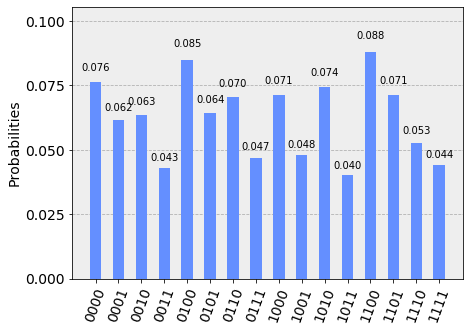

In [9]:
IBMQ.get_provider(hub='ibm-q')
#filters=lambda x: x.configuration().n_qubits <= 5 and not x.configuration().simulator and x.status().
#backend = least_busy(AccountProvider.backends(operational=True))
backend = AccountProvider.get_backend("ibmq_london")
print("least busy backend: ", backend)

job = execute(qc, backend, shots = 1024, optimization_level=3)

job_monitor(job, interval = 2)

results = job.result()
answer = results.get_counts(qc)
print(answer)
print(results.time_taken)

plot_histogram(answer)


### Otimizações


### Simulação II

### Conclusão

### Referências

Tight bounds on quantum searching
https://arxiv.org/abs/quant-ph/9605034

A quantum algorithm for finding the minimum
https://arxiv.org/pdf/quant-ph/9607014.pdf

Quantum Mechanics helps in searching for a needle in a haystack
https://arxiv.org/pdf/quant-ph/9706033.pdf